In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from scipy import sparse
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
it_df = pd.read_csv('data/6_classes_no_names.csv', sep=',')


In [3]:
X = it_df['description'].to_numpy()
y = it_df['class'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0)

In [4]:
vectorizer = TfidfVectorizer(sublinear_tf=False, max_df=0.5, max_features=42, stop_words='english')
X_train = vectorizer.fit_transform(x_train)

In [5]:
feature_names = np.array(vectorizer.get_feature_names())

target_names = [['ds'], ['mobile'],['qa'], ['web'], ['devops'], ['busorg']]

In [6]:
X_test = vectorizer.transform(x_test)

In [7]:
clf_rand = AdaBoostClassifier(RandomForestClassifier(), n_estimators=50, random_state=36)
clf_rand.fit(X_train, y_train)
clf_rand.score(X_test, y_test)

0.8076923076923077

In [8]:
clf_cnb = AdaBoostClassifier(ComplementNB(alpha=.1), n_estimators=50, random_state=36)
clf_cnb.fit(X_train, y_train)
clf_cnb.score(X_test, y_test)

0.8461538461538461

In [9]:
clf_mnb = AdaBoostClassifier(MultinomialNB(alpha=.01), n_estimators=50, random_state=36)
clf_mnb.fit(X_train, y_train)
clf_mnb.score(X_test, y_test)

0.7884615384615384

Random forest


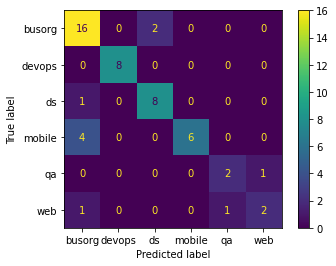

Complement NB


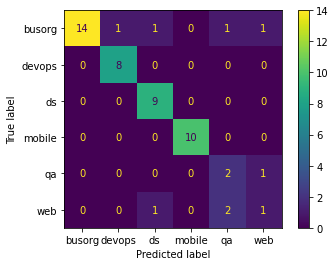

Multinomial NB


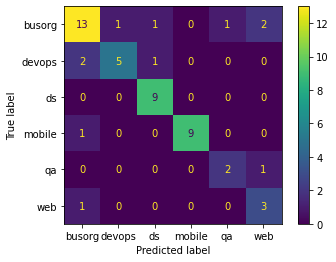

In [10]:
print('Random forest')
metrics.plot_confusion_matrix(clf_rand, X_test, y_test)
plt.show()
print('Complement NB')
metrics.plot_confusion_matrix(clf_cnb, X_test, y_test)
plt.show()
print('Multinomial NB')
metrics.plot_confusion_matrix(clf_mnb, X_test, y_test)
plt.show()

In [11]:
scores = cross_val_score(clf_rand, X_train, y_train, cv=6)
print("cross_val_score_mean rand: ", np.mean(scores))
scores = cross_val_score(clf_cnb, X_train, y_train, cv=6)
print("cross_val_score_mean cnb: ", np.mean(scores))
scores = cross_val_score(clf_mnb, X_train, y_train, cv=6)
print("cross_val_score_mean mnb: ", np.mean(scores))

cross_val_score_mean rand:  0.7275910364145659
cross_val_score_mean cnb:  0.6792717086834733
cross_val_score_mean mnb:  0.6165266106442577


In [12]:
'''
random_state=7
cross_val_score_mean rand:  0.7956582633053223
cross_val_score_mean cnb:  0.7617647058823529
cross_val_score_mean mnb:  0.6792717086834735
    
14
cross_val_score_mean rand:  0.7669467787114845
cross_val_score_mean cnb:  0.7380952380952381
cross_val_score_mean mnb:  0.6459383753501401

20
cross_val_score_mean rand:  0.742577030812325
cross_val_score_mean cnb:  0.70406162464986
cross_val_score_mean mnb:  0.6455182072829132

98
cross_val_score_mean rand:  0.7715686274509803
cross_val_score_mean cnb:  0.7718487394957982
cross_val_score_mean mnb:  0.6890756302521007

40
cross_val_score_mean rand:  0.77703081232493
cross_val_score_mean cnb:  0.7474789915966387
cross_val_score_mean mnb:  0.679971988795518

42
cross_val_score_mean rand:  0.7523809523809524
cross_val_score_mean cnb:  0.7330532212885155
cross_val_score_mean mnb:  0.6602240896358543

75
cross_val_score_mean rand:  0.7819327731092437
cross_val_score_mean cnb:  0.7187675070028011
cross_val_score_mean mnb:  0.6603641456582633
'''

'\nrandom_state=7\ncross_val_score_mean rand:  0.7956582633053223\ncross_val_score_mean cnb:  0.7617647058823529\ncross_val_score_mean mnb:  0.6792717086834735\n    \n14\ncross_val_score_mean rand:  0.7669467787114845\ncross_val_score_mean cnb:  0.7380952380952381\ncross_val_score_mean mnb:  0.6459383753501401\n\n20\ncross_val_score_mean rand:  0.742577030812325\ncross_val_score_mean cnb:  0.70406162464986\ncross_val_score_mean mnb:  0.6455182072829132\n\n98\ncross_val_score_mean rand:  0.7715686274509803\ncross_val_score_mean cnb:  0.7718487394957982\ncross_val_score_mean mnb:  0.6890756302521007\n\n40\ncross_val_score_mean rand:  0.77703081232493\ncross_val_score_mean cnb:  0.7474789915966387\ncross_val_score_mean mnb:  0.679971988795518\n\n42\ncross_val_score_mean rand:  0.7523809523809524\ncross_val_score_mean cnb:  0.7330532212885155\ncross_val_score_mean mnb:  0.6602240896358543\n\n75\ncross_val_score_mean rand:  0.7819327731092437\ncross_val_score_mean cnb:  0.7187675070028011\n